In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img, title = 'Image'):
    plt.imshow(img)
    plt.axis("off")
    plt.style.use('seaborn')
    plt.title(title + str(img.shape))
    plt.show()


(900, 900, 3)


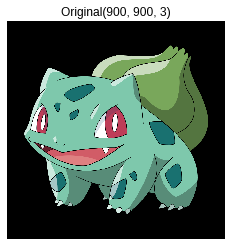

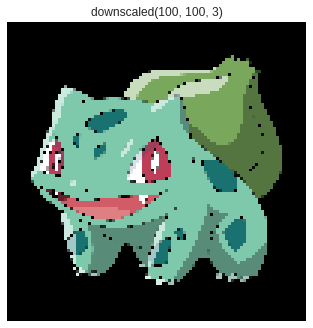

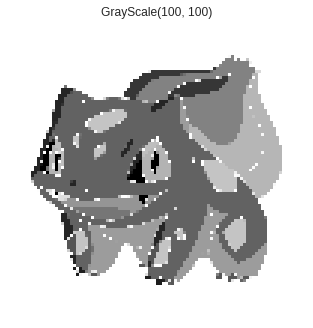

In [3]:
img_ = cv2.imread('Datasets/bulbasaur.png')
print(img_.shape)
img_ = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img = cv2.resize(img_,(100,100))
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img_,"Original")
drawImg(img,"downscaled")
drawImg(img_gray,"GrayScale")


In [4]:
print(img_gray.shape)

(100, 100)


In [5]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]
    
    F = img_filter.shape[0]
    new_img = np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]
                    
                if new_img[row][col]>255:
                    new_img[row][col] = 255
                    
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0
    return new_img

In [42]:
blur_filter = np.ones((6,6))/36

output1 = convolution(img_gray, blur_filter)

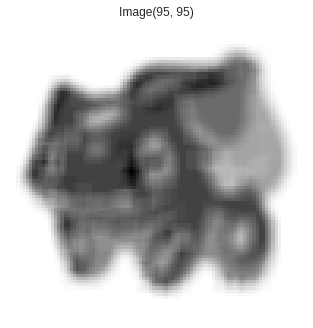

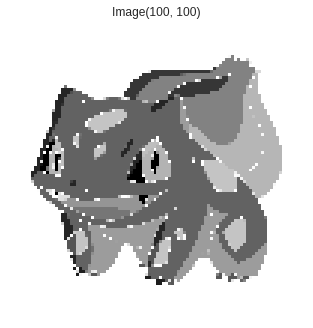

In [43]:
drawImg(output1)
drawImg(img_gray)

In [44]:
edge_filter = np.array((
    [1,0,-1],
    [1,0,-1],
    [1,0,-1]
))
output2 = convolution(img_gray,edge_filter)

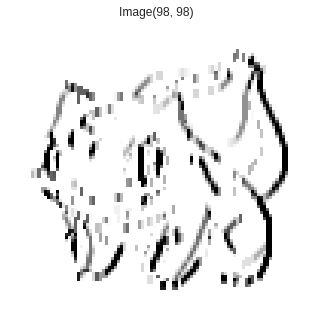

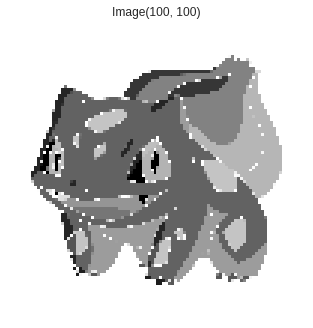

In [45]:
drawImg(output2)
drawImg(img_gray)

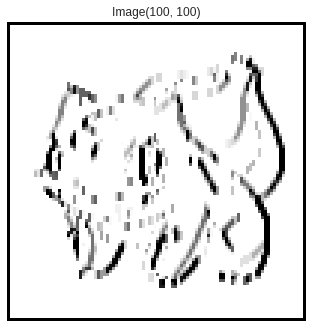

In [52]:
pad_img = np.pad(output2,((1,1),(1,1)),'constant',constant_values=255)
drawImg(pad_img)

# Pooling

In [57]:
X = np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])
def pooling(X,mode='max',stride=2):
    f=2
    H,W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r*stride + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode == 'max':
                output[r][c] = np.max(X_slice)
            elif mode == 'mean':
                output[r][c] = np.mean(X_slice)
    return output

In [58]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
